In [1]:
import gym
import matplotlib.pyplot as plt
import random
import numpy as np
from gridworld.gridworld import GridWorldEnvNew

import argparse
import gym
import numpy as np
from itertools import count

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

env = gym.make('MyGridworld-v2')
store_state = {}
store_action = {}
store_reward = {}
store_qfunc = {}

a_seed = 543
a_render = True 
a_gamma = 1
a_log_interval = 10
a_lr = 1e-2

env.seed(a_seed)
torch.manual_seed(a_seed)

In [2]:
def SARSA_learning(no_episodes, episode_len, gamma, epsilon, alpha): 

    sarsa_qfunc = np.zeros([env.observation_space.n, env.action_space.n])
    sarsa_reward = []

    for i_episode in range(no_episodes):
        ## Intialize the arrays for storing state, action and reward
        store_state[str(i_episode)] = []
        store_action[str(i_episode)] = []
        store_reward[str(i_episode)] = []
        store_qfunc[str(i_episode)] = []
    
        ### Initialize the episode with random state
        init_state, cur_pos = env.reset()
        #print('Reset state for SARSA: ', i_episode, init_state)

        ### epsilon_greedy algorithm for "A" action
        myprob = random.uniform(0, 1) 
        if myprob < epsilon:
            #print('Random action executed')
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(sarsa_qfunc[cur_pos]) 
        store_action[str(i_episode)].append(action)
    
        for t in range(episode_len):        
            cur_q = sarsa_qfunc[cur_pos, action] ## Q(S,A)        
            
            next_state, reward, done, info = env.step(action)       
            next_pos = info['pos'] ## S'
                
            ### epsilon_greedy algorithm for A' action
            nextprob = random.uniform(0, 1) 
            if nextprob < epsilon:
                #print('Random next action executed')
                next_action = env.action_space.sample() # Explore action space
            else:
                next_action = np.argmax(sarsa_qfunc[cur_pos]) 
        
            next_max = sarsa_qfunc[next_pos, next_action] ## Q(S',A')            
            ### Q(S,A) = Q(S,A) + alpha( R + gamma*Q(S',A')-Q(S,A) )
            new_value = (1 - alpha) * cur_q + alpha * (reward + gamma * next_max)
            sarsa_qfunc[cur_pos, action] = new_value
        
            cur_pos = next_pos  ## S<--S'
            action = next_action ## A<--A'
        
            ### Plotting and Storing
            #print(" ")
            #print("Action: ", action)     
            #print("Reward: ", reward)
            #print("State:  ", next_pos, next_state)
            store_action[str(i_episode)].append(action)
            store_reward[str(i_episode)].append(reward)
            store_state[str(i_episode)].append(next_pos)
            env.render()
    
        store_qfunc[str(i_episode)] = sarsa_qfunc
        sarsa_reward.append(sum(store_reward[str(i_episode)]))
    
    env.close()
    return sarsa_qfunc, sarsa_reward

In [3]:
def Q_learning(no_episodes, episode_len, gamma, epsilon, alpha):

    ql_qfunc = np.zeros([env.observation_space.n, env.action_space.n])
    ql_reward = []
    
    for i_episode in range(no_episodes):
        ## Intialize the arrays for storing state, action and reward
        store_state[str(i_episode)] = []
        store_action[str(i_episode)] = []
        store_reward[str(i_episode)] = []
        store_qfunc[str(i_episode)] = []
    
        ### Initialize the episode with random state
        init_state, cur_pos = env.reset()
        #print('Reset state for QL: ', i_episode, init_state)
    
        for t in range(episode_len):

            ### epsilon_greedy algorithm for A action
            myprob = random.uniform(0, 1) 
            if myprob < epsilon:
                #print('Random action executed')
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(ql_qfunc[cur_pos]) 
            # Exploit learned values env.action_space.sample()  # 
            
            store_action[str(i_episode)].append(action)
            next_state, reward, done, info = env.step(action)
        
            next_pos = info['pos'] ## S'
            cur_q = ql_qfunc[cur_pos, action] ## Q(S,A)        
            next_q = np.max(ql_qfunc[next_pos]) ## A' = max_a Q(S',a)
        
            ### Q(S,A) = Q(S,A) + alpha( R + gamma*Q(S',A')-Q(S,A) )
            q_val = (1 - alpha) * cur_q + alpha * (reward + gamma * next_q)
            ql_qfunc[cur_pos, action] = q_val ## Q (S,A)
        
            cur_pos = next_pos ## S<--S'
            
            ### Plotting and Storing
            #print(" ")
            #print("Action: ", action)     
            #print("Reward: ", reward)
            #print("State:  ", next_pos, next_state)
            store_state[str(i_episode)].append(next_pos)
            store_reward[str(i_episode)].append(reward)
            env.render()
    
        store_qfunc[str(i_episode)] = ql_qfunc
        ql_reward.append(sum(store_reward[str(i_episode)]))

    env.close()
    return ql_qfunc, ql_reward

In [4]:
## Plotting the learning curves of Qlearning and SARSA algorithm
### Hard or easy level can be changed in the gridworld.py file
no_episodes = 50 #0
episode_len = 100
alpha = 0.01
gamma = 0.8
epsilon = 0.1

### These results are for hard-level
sarsa_qfunc, sarsa_reward = SARSA_learning(no_episodes, episode_len, gamma, epsilon, alpha)
ql_qfunc, ql_reward = Q_learning(no_episodes, episode_len, gamma, epsilon, alpha)

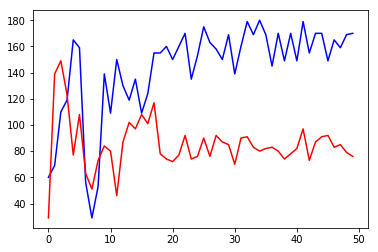

In [5]:
plt.plot(np.arange(no_episodes), ql_reward, 'b')
plt.plot(np.arange(no_episodes), sarsa_reward, 'r')
plt.show()

In [ ]:
#### Therefore, Q-learning and SARSA-learning seem to be more robust and have a better consistent performance 
#### as compared to reinforce algorithm which is explained in BUILD_REINFORCE file